In [54]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\clari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\clari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [55]:
Task_A= pd.read_table('task_a.txt', sep='\s+') 
Task_B = pd.read_table('task_b.txt', sep='\s+')


In [3]:
Task_A

,CHR,SNP,UNADJ,GC,QQ,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY
0,6,rs11962226,2.168000e-15,0.000073,3.471000e-07,3.123000e-09,3.123000e-09,3.123000e-09,3.123000e-09,1.610000e-09,2.376000e-08
1,9,rs7031414,3.315000e-15,0.000082,1.041000e-06,4.775000e-09,4.775000e-09,4.775000e-09,4.775000e-09,1.610000e-09,2.376000e-08
2,3,rs9311319,4.536000e-15,0.000089,1.736000e-06,6.534000e-09,6.534000e-09,6.534000e-09,6.534000e-09,1.610000e-09,2.376000e-08
3,4,rs10007859,4.953000e-15,0.000091,2.430000e-06,7.135000e-09,7.135000e-09,7.135000e-09,7.135000e-09,1.610000e-09,2.376000e-08
4,1,rs17130151,5.589000e-15,0.000094,3.124000e-06,8.050000e-09,8.050000e-09,8.050000e-09,8.050000e-09,1.610000e-09,2.376000e-08
...,...,...,...,...,...,...,...,...,...,...,...
1440499,23,rs5983749,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1440500,25,rs35755665,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1440501,25,rs28602757,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1440502,25,rs35964637,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [59]:
import scipy
from scipy import stats

In [60]:
model= pd.read_table('plink_model.txt', sep="\s+")

lamb = np.median(model['CHISQ'])/scipy.stats.chi2.ppf(0.5,1)

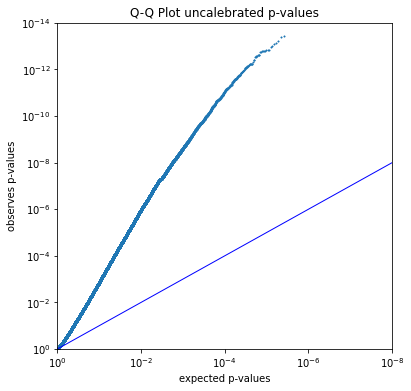

In [71]:
plt.figure(figsize=(6, 6))
plt.scatter(Task_A['QQ'],Task_A['UNADJ'], c='tab:blue',linewidths=.5, s= 2)

plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,10**(-8)])
plt.ylim([1,10**(-14)])
plt.plot([1,10**(-14)],[1,10**(-14)],c='blue',linewidth=1)

plt.title("Q-Q Plot uncalibrated p-values")

#plt.legend()
plt.savefig("output_a.jpg")
plt.show()


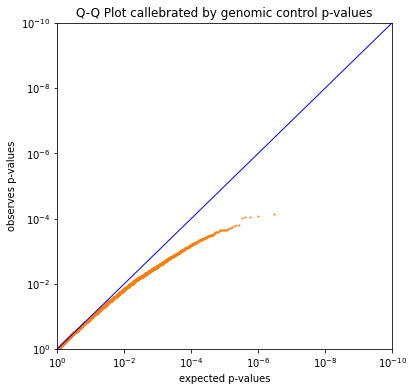

In [68]:
plt.figure(figsize=(6, 6))
plt.scatter(Task_B ['QQ'],Task_B['GC'],c='tab:orange',linewidths=.5, s=2)


plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,10**(-10)])
plt.ylim([1,10**(-10)])
plt.plot([1,10**(-10)],[1,10**(-10)],c='blue',linewidth=1)

plt.title("Q-Q Plot callebrated by genomic control p-values")

#plt.legend()
plt.savefig("output_b.jpg")
plt.show()


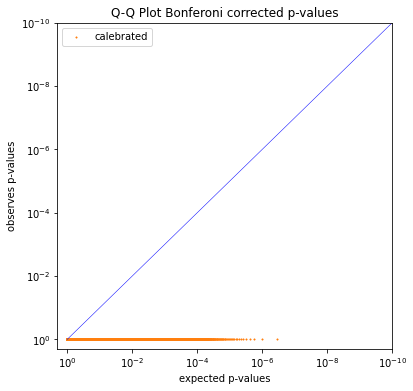

In [76]:
plt.figure(figsize=(6, 6))

plt.scatter(Task_B['QQ'],Task_B['BONF'], c='tab:orange',linewidths=.5,s=2, label ='calibrated')

plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")

plt.xlim([2,10**(-10)])
plt.ylim([2,10**(-10)])
plt.plot([1,10**(-10)],[1,10**(-10)],c='blue',linewidth=0.5)


plt.title("Q-Q Plot Bonferroni corrected p-values")

plt.legend()
plt.savefig("output_c_corr.jpg")
plt.show()


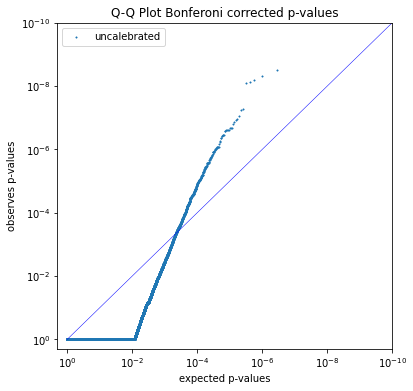

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter(Task_A['QQ'],Task_A['BONF'], c='tab:blue',linewidths=.5, s=2, label ='uncalibrated')

plt.xlabel("expected p-values")
plt.ylabel("observed p-values")
plt.xscale("log")
plt.yscale("log")

plt.xlim([2,10**(-10)])
plt.ylim([2,10**(-10)])
plt.plot([1,10**(-10)],[1,10**(-10)],c='blue',linewidth=0.5)


plt.title("Q-Q Plot Bonferroni corrected p-values")

plt.legend()
plt.savefig("output_c_uncorr.jpg")
plt.show()

(array([      0.,       0.,       0.,       0.,       0., 1440504.,
              0.,       0.,       0.,       0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

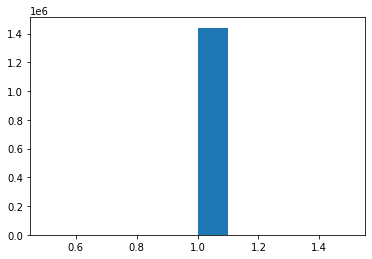

In [79]:
plt.hist(Task_B['BONF'])

(array([5.664000e+03, 1.579000e+03, 1.006000e+03, 8.220000e+02,
        7.060000e+02, 6.040000e+02, 5.700000e+02, 5.620000e+02,
        4.940000e+02, 1.428497e+06]),
 array([3.12300000e-09, 1.00000003e-01, 2.00000002e-01, 3.00000002e-01,
        4.00000002e-01, 5.00000002e-01, 6.00000001e-01, 7.00000001e-01,
        8.00000001e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

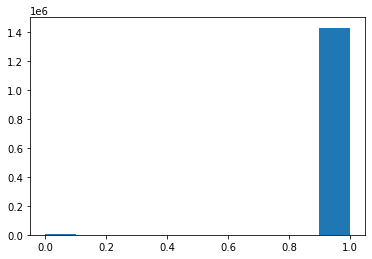

In [80]:
plt.hist(Task_A['BONF'])

In [82]:
import numpy as np
from fastlmm.association import single_snp
from fastlmm.util import example_file 

In [83]:
results_df = single_snp('plink',pheno='model', count_A1=True)

AssertionError: snp_input cannot be None here

In [ ]:
# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])